<!--NAVIGATION-->
< [Bonus Materials I](09.00 Bonus Materials I.ipynb) | [Contents](Index.ipynb) >

# Bonus Materials II

Vectorised backtesting

In [1]:
import numpy as np
import pandas as pd
import oandapy
import configparser
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

config = configparser.ConfigParser()
config.read('../config/config_v1.ini')
account_id = config['oanda']['account_id']
api_key = config['oanda']['api_key']

oanda = oandapy.API(environment="practice", 
                    access_token=api_key)

In [2]:
response = oanda.get_history(instrument="EUR_USD",
                             granularity="H1",
                             count = 5000)

In [3]:
res = pd.DataFrame(response['candles'])
res.columns = ['Close_Ask', 'Close_Bid', 'Complete', 
               'High_Ask', 'High_Bid', 'Low_Ask', 'Low_Bid', 
               'Open_Ask', 'Open_Bid', 'Time', 'Volume']
res = res.reindex_axis(['Time', 'Open_Bid', 'Open_Ask', 
                        'High_Bid', 'High_Ask', 'Low_Bid', 
                        'Low_Ask', 'Close_Bid', 'Close_Ask', 
                        'Complete', 'Volume'], 
                       axis=1)

In [4]:
df = res[['Time', 'Close_Bid', 'Close_Ask']].copy()
df['rtns'] = res['Close_Bid'].pct_change()

In [5]:
dtrain = df[0:4500].copy()
dtest = df[4500:].copy()

# Experiment With the Training Data Set

In [6]:
k = range(1,13)
h = 1

In [7]:
for oo in k:
    dtrain['signal'] = np.sign(dtrain['rtns'].rolling(oo).sum())
    dtrain['strategy_rtn'] =  dtrain['signal'].shift(1) * dtrain['rtns']
    res = dtrain['strategy_rtn'].dropna().sum()
    print('{0:3} {1:>8.4f}'.format(oo, res))

  1   0.0267
  2  -0.0196
  3  -0.0609
  4   0.0201
  5   0.0419
  6   0.0417
  7   0.0146
  8  -0.0044
  9  -0.0286
 10  -0.0169
 11   0.0888
 12   0.0306


***

# Vectorized Backtesting With the Test Set - Momentum

Note: we use the k=11,h=1 combination as it has the highest returns in the training set 

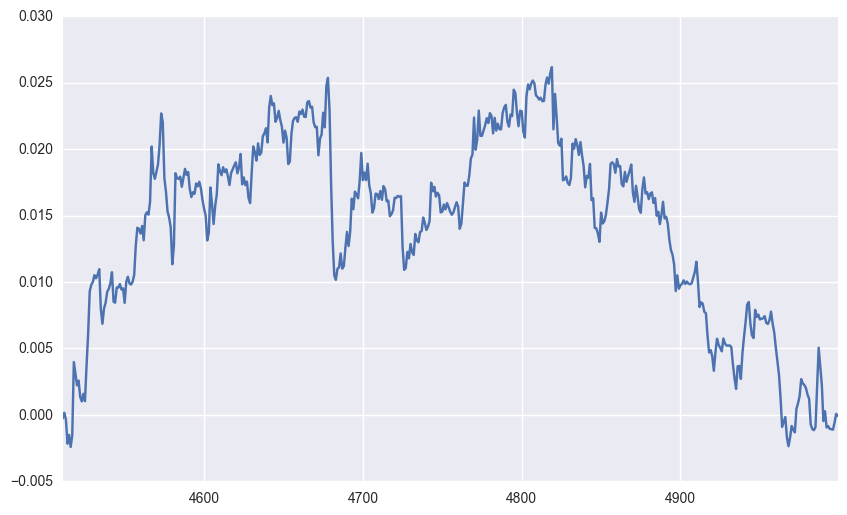

In [8]:
dtest['signal'] = np.sign(dtest['rtns'].rolling(11).sum())
dtest['result'] = dtest['signal'].shift(1) * dtest['rtns']
dtest['result'].dropna().cumsum().plot(figsize=(10,6));

***

# Vectorized Backtesting With the Test Set - Reversion

Note: we use the k=3,h=1 combination as it has the highest returns in the training set for a reversion strategy

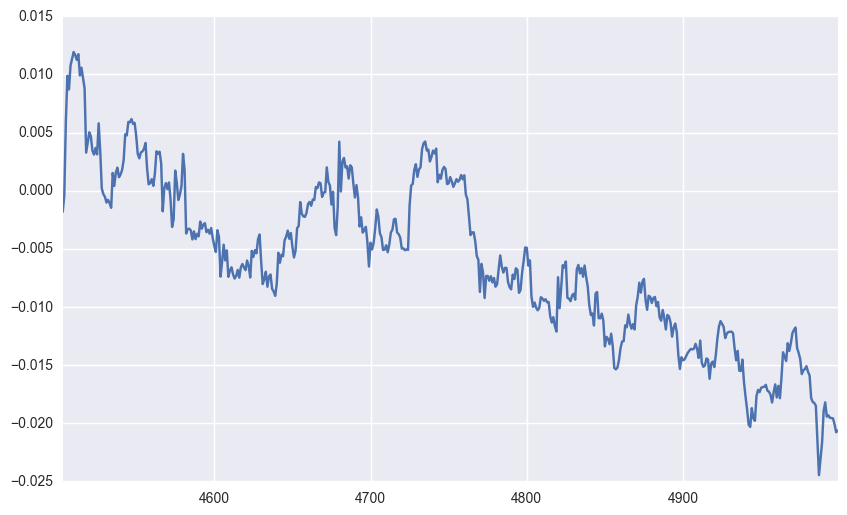

In [9]:
dtest['signal'] = - np.sign(dtest['rtns'].rolling(3).sum())
dtest['result'] = dtest['signal'].shift(1) * dtest['rtns']
dtest['result'].dropna().cumsum().plot(figsize=(10,6));

<!--NAVIGATION-->
< [Bonus Materials I](09.00 Bonus Materials I.ipynb) | [Contents](Index.ipynb) >